## [UNDER CONSTRUCTION] 
## Understanding dynamical systems, phase space and trajectories

This notebook covers an informal introduction to dynamical systems and some examples in 1D and 2D.

### Terminology
- **nullcline.** points in space where the value of a variable does not change with time.
- **phase portrait.** a plot of a vector field that shows how the solutions to these equations will evolve from a given starting point.
- **autonomous system.** when all parameters are constant.
- **non autonomous system.** when one or more parameters are time dependent (denoted at $\dot x = f(x,t)$
- **state variable.** variables that fully define the state of a system. 

### Differential equations

> "The only thing constant in life, is that everything changes."

... Its true, thats why we have differential equations!

Differential equations are used to study how (physical) systems change. Ordinary differential equations are used to study how something changes as a function of time. They involve unknown functions and derivatives, so a solution to an ODE is a function that makes it correct.


### Biological systems

Biological systems are not linear in general, but thats okay because we can use linear models to approximate these more complex systems. 


### Dynamical Systems

The goal of dynamical systems theory is to understand why and *how* the behaviour depends on the *initial conditions* and the *parameters* of the system.

Dynamical systems can be continous or discrete, depending on what you use to describe them. Continuous 1D dynamical systems are usually written in this form:

$$
\dot x = f(x) , \qquad x(0)= x_0 \in \mathbb{R}
$$
where $x$ is a scalar variable that changes over time, it described the current state of the system. $\dot x$ is the derivative of $x$ w.r.t time $t$, $f$ is a scalar function (meaning its output is just a number) that determines how the system changes over time; the evolution of the system. 

$x_0$ is the initial condition, where your system starts out. $\mathbb{R}$ is a line of real numbers, which is called the *phase line* or *state line*. 

In the context of neural dynamics we have

$$
\dot V = F(V), \qquad V(0)= V_0 \in \mathbb{R}
$$

Where $V$ is the membrane potential and $F(V)$ the steady state I-V curve.

In the 4D Hodgkin Huxley model for example, the **state** of the HH model is captured in a 4 dimensional vector

$$
\mathbf{s} =  \begin{bmatrix}
    V \\
    m \\
    n \\
    h 
\end{bmatrix}
$$

To solve a differential equation means to find a function $x(t)$ whose initial value is $x(0) = x_0$ and whose derivative is $f(x(t))$ at each moment $t>0$.

Solving differential equations is very hard, if not impossible sometimes. Luckily, we don't actually need to solve it. Because we are interested in how the system *behaves* and how changing the parameters and state will change its trajectory. As long as we can display this approximation of the qualitative behaviour, we are happy.


### Geometric analysis

When analysing a dynamical system, step 1 is to plot the graph of the function $f$.

<div>
<img src=http://drive.google.com/uc?export=view&id=1DqcOuFHZI9XUv7IxHSUxGYyBwlW9nuFB width="500">
</div>

1D dynamical systems are systems with only one variable.

- Since $f(x) = \dot x$ , the change in x over time, at every point where $x$ where $f(x)$ is negative, the derivative is negative and thus the state variable x decreases. 
- At each point where f(x) is positive, the rate of change is positive, so the state variable x increases. 

The direction of movement of the state variable $x$, and thus the evolution of the dynamical system, is determined by the sign of the function $f(x)$.

### Finding equilibria 

Next, we want to find the equilibria, or rest points of the system. These are the values of the state variable where 
$$
f(x) = 0 \qquad (x \text{ is an equilibrium})
$$

At each point where $\dot x = 0$, x doesn't change. You can think of these points as equilibria, where the inward and outwards currents balance each other out.

<div>
<img src=https://www.researchgate.net/profile/Alexander_Konyukhov/publication/320216159/figure/fig4/AS:545994494275584@1507186639069/position-of-mass-point-a-Positive-static-stability-stable-equilibrium-b-Negative.png
 width="500">
</div>


Equilibria can be stable or unstable. A stable equilibrium is a pendulum that, when giving it a nudge, will eventually return to an angle of 0.
An unstable equilibrium on the other hand is more like a pencil that is balancing on its tip. One small movement and it will fall down. 

Whether the equilibrium is stable or unstable is determined by the slope of the graph, $f'(x)$. If graph goes from positive to negative, the equilibrium is stable.

<div>
<img src=http://drive.google.com/uc?export=view&id=19cK8VURqaPnmPSPAdB8Oa-zJt8t8F6eC width="500">
</div>

Systems that have two or multiple attractors that coexist at the same time are called bistable or multistable respectively. 

### Examples of 1D systems

- leaky current 
$$
I_L = C \dot V = -g_L (V-E_L) \qquad(1.)
$$

where the only variable is voltage and the rest are parameters (constants).

- The Fitzhugh-Nagumo equation (nonlinear)

$$
\frac{dv}{dt} = v(t) - \frac{1}{3}v(t)^3
$$

### Phase portraits

The phase portrait is an essential tool for analysing a dynamical system. It depicts all the stable and unstable equilibria and allows you to infer the trajectory of a system over time, given the initial state.



In [3]:
# import dependencies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize

# Example 1: Chemistry

(This python example is based on the brilliant.org course ["Differential equations I"](https://brilliant.org/practice/weve-got-chemistry-modeling/?p=2))

Chemistry studies reactions of matter. Say we have two reactants, $A$ and $B$, that they produce a product $X$. We want to know how the amount of product, $X$,changes over time. 

$$
[A] + [B] \rightarrow [X] \\
O + O_3 \rightarrow 2O_2
$$

![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/kYXJm5Sup3-group-13.png?width=250)

We obtain the following differential equation, as a function of time. 
$$
\frac{dx}{dt} = k[a-x(t)][b-x(t)]\,\,, \,x(0) = 0
$$

where the constant solutions ($\dot x = 0$) are $x(t)=a$ and $x(t)=b$

This is a **first-order *autonomous* differential equation**, meaning the independent variable doesn't explicitly appear in the equation.

--- 


In [11]:
# define physical parameters (reactants)
a = 5
b = 3
k = 2 # some constant

# initial values 
X_0 = 6 # initial amount of product
X_DOT_0 = 0 # initial change of product

## 1.1 Plot the phase line

A phase portrait is a tool to understand the behaviour of an autonomous first-order differential equation $\dot x = f(x(t))$
- the roots of $f$ are equilibria (constant solutions)
- arrows show where the solutions tend to and tell whether the equilibria are stable or unstable

In [12]:
def phase_line(x_array):
    '''
    calculates the y coordinates for 
    a given function and input array
    '''
    y_coordinates = []
    for i in range(len(x_array)):
        x = x_array[i]
        f_x = k*(a-x)*(b-x)
        y_coordinates.append(f_x)
    
    return y_coordinates

x_array = np.linspace(-20,40,100)
y = phase_line(x_array) 

# find roots of the function
r = optimize.root(phase_line, 1) # pass in function, initial guess
r2 = optimize.root(phase_line, 4) 
roots = np.array([r.x, r2.x])

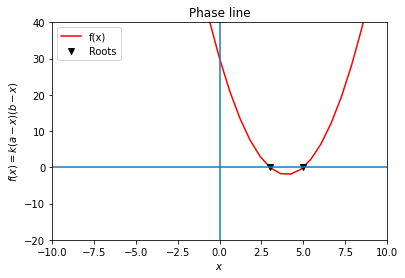

In [13]:
# plot the function
plt.plot(x_array,y,'r',label='f(x)')
# plot the roots
plt.plot(roots, phase_line(roots),'kv', label="Roots")
xaxis = plt.axhline(0);
yaxis = plt.axvline(0);
plt.ylim(-20,40)
plt.xlim(-10,10);
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)=k(a-x)(b-x)$')
plt.title('Phase line');
plt.legend();

## 1.2 Solve the ODE

In [14]:
def get_x_dot(x):
    return k*(a-x)*(b-x)

def get_x(t,x0):
    xvalues = []
    x_dot_values = []
    x = x0
    x_dot = X_DOT_0
    delta_t = 0.1

    for time in np.arange(0,t,delta_t): # start, stop, step
        x_dot = get_x_dot(x)
        x_dot_values.append(x_dot)
        #print(f'x_dot: {x_dot}')
        x += x_dot * delta_t
        xvalues.append(x)
        #print(f'x: {x}')
    return x, xvalues, x_dot_values

In [15]:
# arguments: t final and initial value
x, xvalues, x_dot_values = get_x(1,6)

print(x_dot_values)

[6, 11.519999999999996, 26.155007999999984, 79.09013287600123, 405.63770898688955, 6012.913714754806, 861015.5012225318, 15053790693.233541, 4.5328547125604977e+18, 4.109354396332615e+35]


## 1.3 Plot the trajectory for each initial condition

The trajectory depends on the initial state $x_0$ of the system, if we start with the condition $x(0)>a>b>0$. 

Then what happens? $x$ will keep increasing.

If $x_0 = \frac{a+b}{2}$ the solution is concave up always.
The trajectory of the system depends on the intial condition.

Text(0.5, 0, 't')

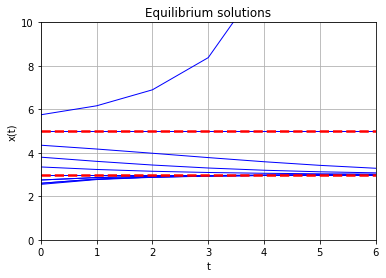

In [16]:
t0 = 0; tf = 10;

t_points = np.array([0,1,2,3,4,5,6,7,8,9])

# start with a few possible initial conditions to find their trajectories
for x0 in np.arange(0,6,0.5): # start, stop, step
  x,xvalues,x_dot_values = get_x(1, x0)
  plt.plot(t_points,xvalues,'b',linewidth=1)

# plot the equilibrium points
# these are the points for which x_dot = 0
plt.plot([t0,tf],[3,3],'r--', linewidth=2.5)
plt.plot([t0,tf],[5,5],'r--', linewidth=2.5)

plt.grid(True)
plt.axis([0,6,0,10])
plt.title("Equilibrium solutions")
plt.ylabel('x(t)')
plt.xlabel('t')

## 1.4. Interpretation

# One dimensional dynamical systems: the leaky integrate and fire

# Resources

- Izhikevich - Dynamical Systems in Neuroscience
- [Dynamical Systems in NS talk](https://www.youtube.com/watch?v=oz4l7gj0AjY&t=464s)
- Brilliant.org, course on differential equations 
- Differential equations [page](https://www.math.ubc.ca/~pwalls/math-python/differential-equations/first-order/)